In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix

**Data Cleaning and Preprocessing**

In [53]:
df = pd.read_csv('/content/credit_train.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [55]:
df.shape

(100514, 19)

In [56]:
columns = df.columns.str.replace(' ','_')
df.columns = columns

In [57]:
df.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [58]:
df

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current_Loan_Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Credit_Score,80846.0,1.076456e+03,1.475404e+03,585.0,705.0000,724.0,7.410000e+02,7.510000e+03
Annual_Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly_Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years_of_Credit_History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months_since_last_delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number_of_Open_Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number_of_Credit_Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current_Credit_Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Maximum_Open_Credit,99998.0,7.607984e+05,8.384503e+06,0.0,273438.0000,467874.0,7.829580e+05,1.539738e+09


In [60]:
df.drop(['Loan_ID', 'Customer_ID'], axis = 1, inplace = True)

In [61]:
df.duplicated().sum()

10728

In [62]:
duplicated=df.duplicated().sum()
print((duplicated/len(df))*100 , '%')

10.67314006009113 %


In [63]:
df.drop_duplicates(inplace=True)

In [64]:
df.duplicated().sum()

0

In [65]:
df.isnull().sum()

Loan_Status                         1
Current_Loan_Amount                 1
Term                                1
Credit_Score                    19155
Annual_Income                   19155
Years_in_current_job             3803
Home_Ownership                      1
Purpose                             1
Monthly_Debt                        1
Years_of_Credit_History             1
Months_since_last_delinquent    48338
Number_of_Open_Accounts             1
Number_of_Credit_Problems           1
Current_Credit_Balance              1
Maximum_Open_Credit                 3
Bankruptcies                      191
Tax_Liens                          10
dtype: int64

In [66]:
missing_values_percentage = 100*df.isnull().sum() / len(df)
missing_values_percentage

Loan_Status                      0.001114
Current_Loan_Amount              0.001114
Term                             0.001114
Credit_Score                    21.334061
Annual_Income                   21.334061
Years_in_current_job             4.235627
Home_Ownership                   0.001114
Purpose                          0.001114
Monthly_Debt                     0.001114
Years_of_Credit_History          0.001114
Months_since_last_delinquent    53.836901
Number_of_Open_Accounts          0.001114
Number_of_Credit_Problems        0.001114
Current_Credit_Balance           0.001114
Maximum_Open_Credit              0.003341
Bankruptcies                     0.212728
Tax_Liens                        0.011138
dtype: float64

 'Months since last delinquent' column has more than 50% null values, So I will drop it


In [67]:
df = df.drop(columns = 'Months_since_last_delinquent', axis=1)

In [68]:
columns_to_drop_null = ['Loan_Status', 'Current_Loan_Amount', 'Term',
                        'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
                        'Number_of_Open_Accounts', 'Number_of_Credit_Problems',
                        'Current_Credit_Balance', 'Maximum_Open_Credit','Tax_Liens']
df.dropna(subset=columns_to_drop_null , inplace=True)

**EDA**

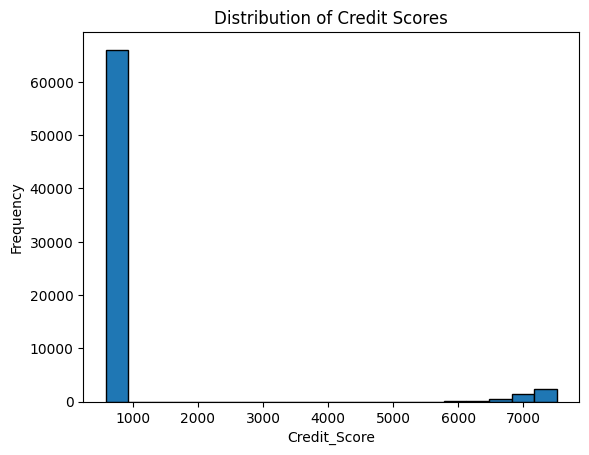

In [69]:
df['Credit_Score'].plot(kind='hist', bins=20, edgecolor='k')
plt.xlabel('Credit_Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores')
plt.show()


In [70]:
imputer = SimpleImputer(strategy='most_frequent')

In [71]:
df['Credit_Score'] = imputer.fit_transform(df[['Credit_Score']])

Text(0.5, 1.0, 'Distribution of Annual Income')

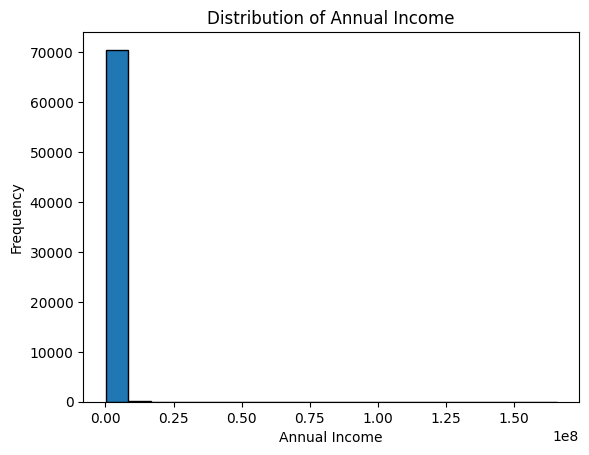

In [72]:
df['Annual_Income'].plot(kind='hist', bins=20, edgecolor='k')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')


In [73]:
Mean_imputer = SimpleImputer(strategy='mean')
df['Annual_Income'] = Mean_imputer.fit_transform(df[['Annual_Income']])

Text(0.5, 1.0, 'Proportion of Years in Current Job')

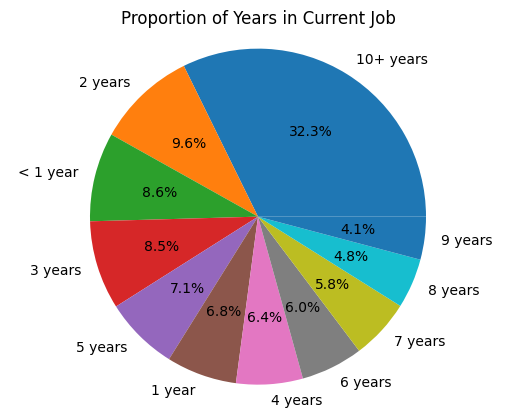

In [74]:
year_counts = df['Years_in_current_job'].value_counts()
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Years in Current Job')


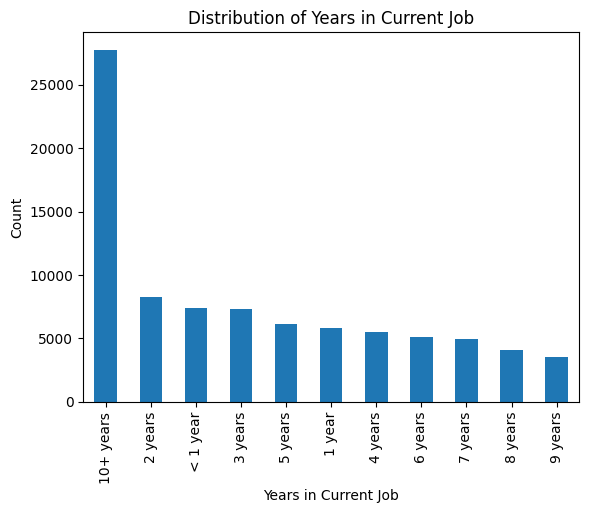

In [75]:
df['Years_in_current_job'].value_counts().plot(kind='bar')
plt.xlabel('Years in Current Job')
plt.ylabel('Count')
plt.title('Distribution of Years in Current Job')

plt.show()


Text(0.5, 1.0, 'Distribution of Years in Current Job')

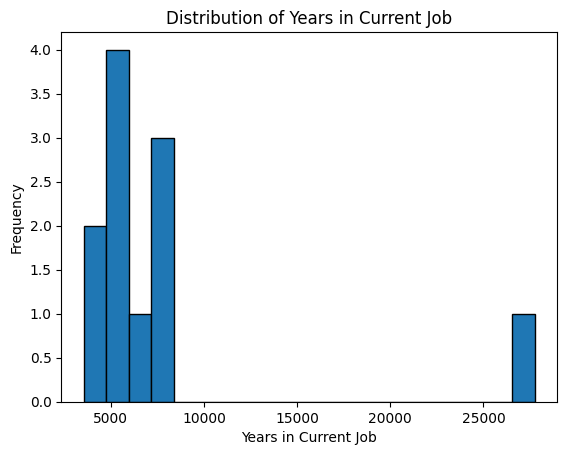

In [76]:
df['Years_in_current_job'].value_counts().plot(kind='hist', bins=20, edgecolor='k')
plt.xlabel('Years in Current Job')
plt.ylabel('Frequency')
plt.title('Distribution of Years in Current Job')


In [77]:
le = LabelEncoder()
df['Years_in_current_job'] = le.fit_transform(df[['Years_in_current_job']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
df['Term'] = le.fit_transform(df['Term'])

In [79]:
df['Home_Ownership'] = le.fit_transform(df['Home_Ownership'])

In [80]:
df['Purpose'] = le.fit_transform(df['Purpose'])

In [81]:
Mean_imputer = SimpleImputer(strategy='mean')
df['Years_in_current_job'] = Mean_imputer.fit_transform(df[['Years_in_current_job']])

Text(0.5, 1.0, 'Distribution of Bankruptcies')

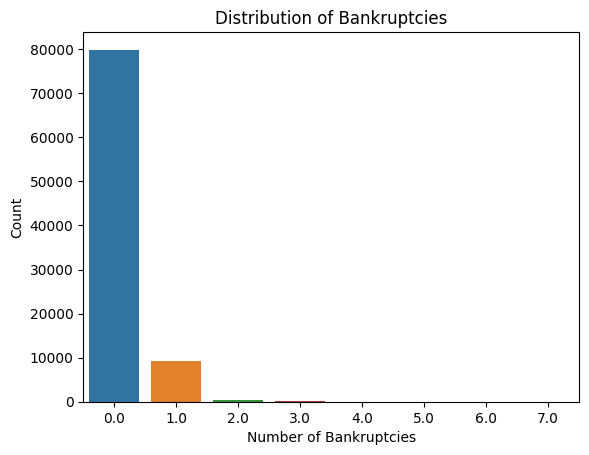

In [82]:
sns.countplot(x='Bankruptcies', data=df)
plt.xlabel('Number of Bankruptcies')
plt.ylabel('Count')
plt.title('Distribution of Bankruptcies')



In [83]:
imputer = SimpleImputer(strategy='most_frequent')
df['Bankruptcies'] = imputer.fit_transform(df[['Bankruptcies']])

In [84]:
df.isnull().sum()

Loan_Status                  0
Current_Loan_Amount          0
Term                         0
Credit_Score                 0
Annual_Income                0
Years_in_current_job         0
Home_Ownership               0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
Tax_Liens                    0
dtype: int64

In [85]:
df.columns

Index(['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

**Visulations**

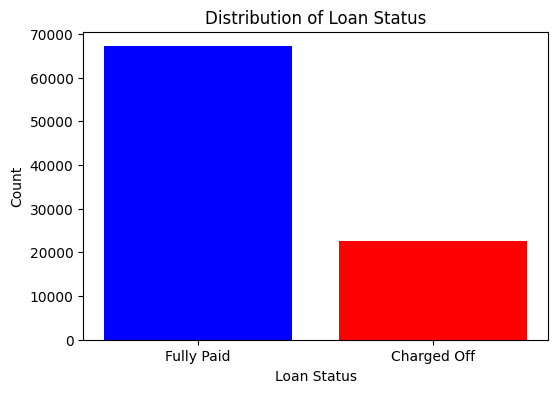

In [86]:
# Count the occurrences of each loan status
loan_status_counts = df['Loan_Status'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.bar(loan_status_counts.index, loan_status_counts.values, color=['blue', 'red'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

Text(0.5, 1.0, 'Loan Status by Term')

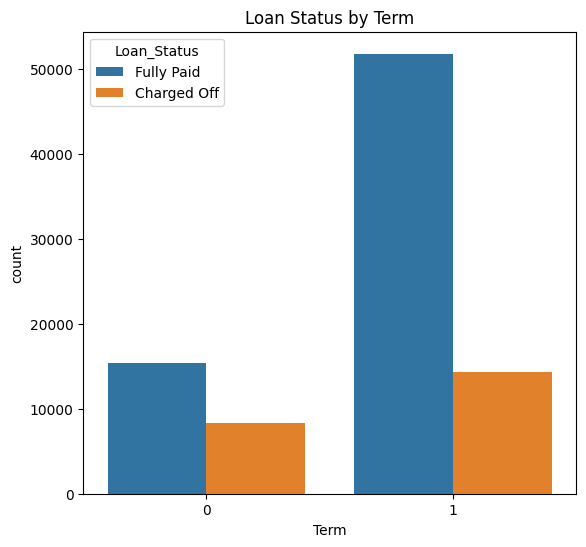

In [87]:
#  Categorical Plots
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=  df['Term'], hue=df['Loan_Status'])
plt.title('Loan Status by Term')

<ipython-input-88-30f9faf88231>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

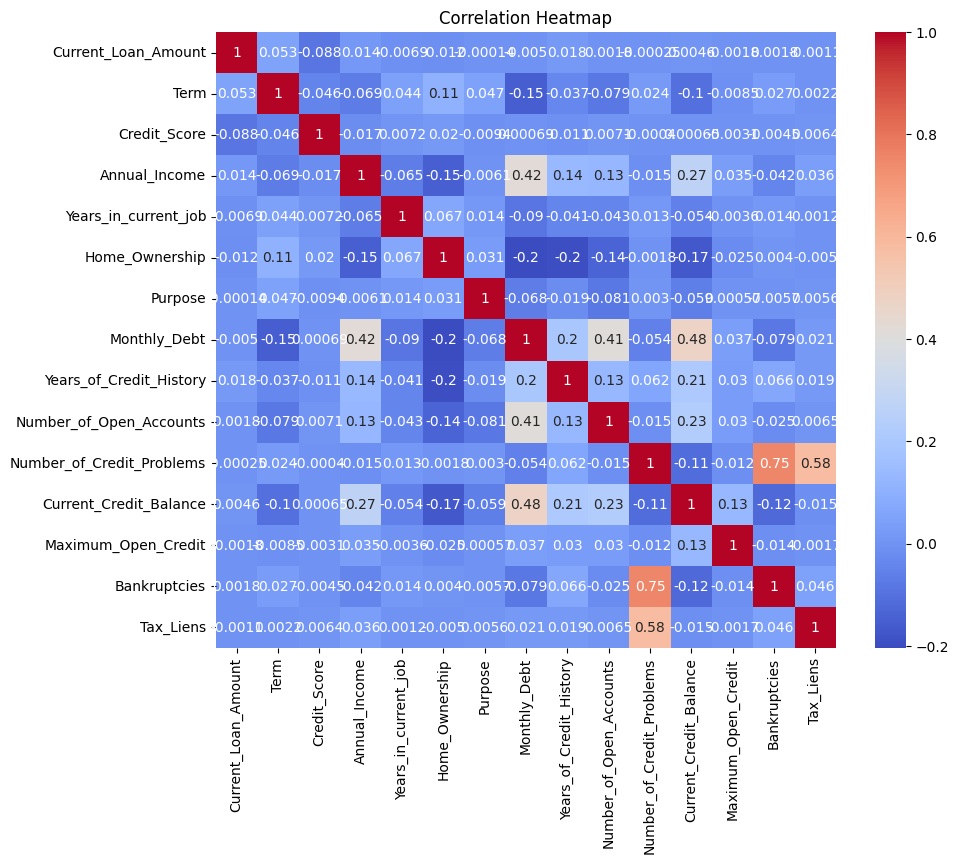

In [88]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Loan Status by Home Ownership')

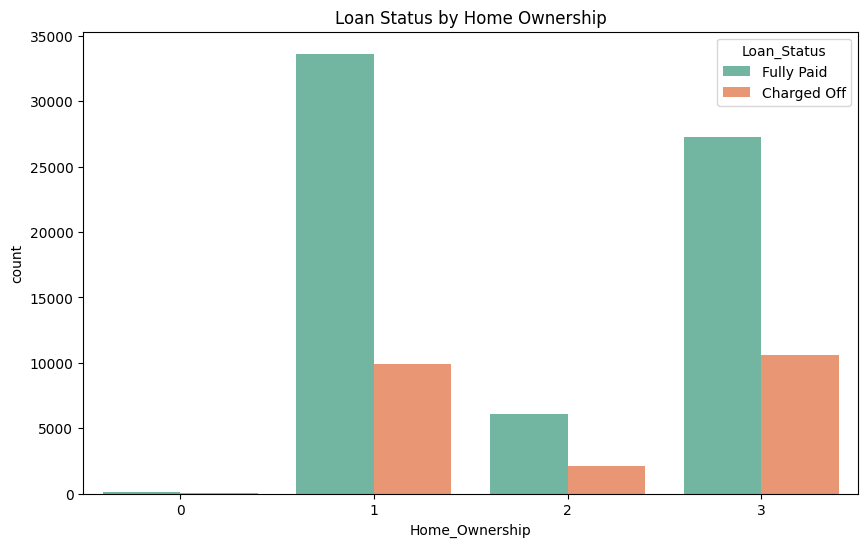

In [89]:
# Loan Status by Home Ownership
plt.figure(figsize=(10, 6))
sns.countplot(x='Home_Ownership', hue='Loan_Status', data=df, palette="Set2")
plt.title('Loan Status by Home Ownership')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

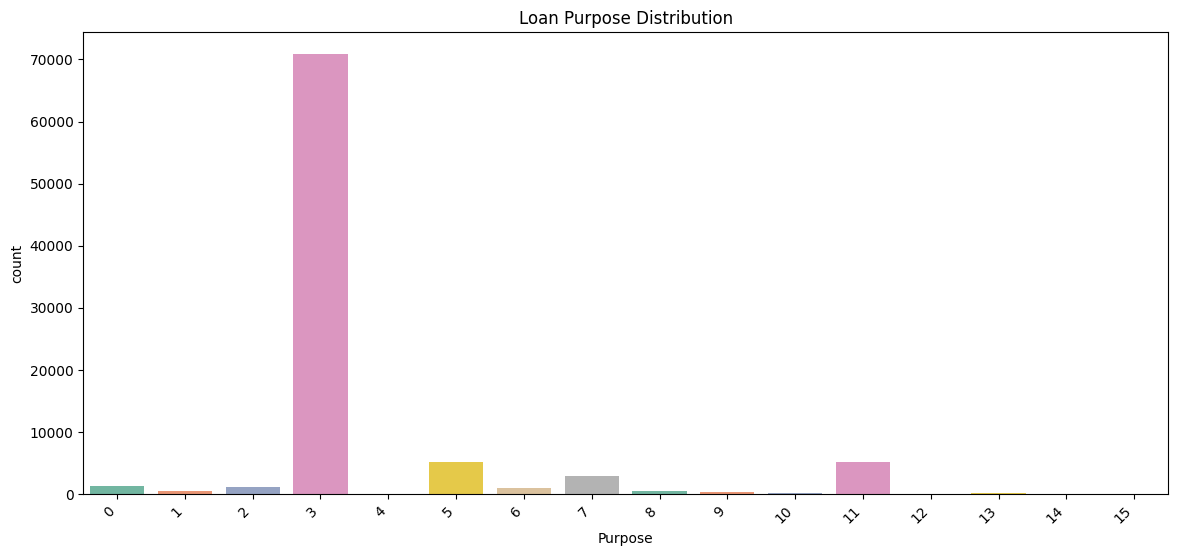

In [90]:
# Loan Purpose Distribution
plt.figure(figsize=(14, 6))
sns.countplot(x='Purpose', data=df, palette="Set2")
plt.title('Loan Purpose Distribution')
plt.xticks(rotation=45, ha="right")

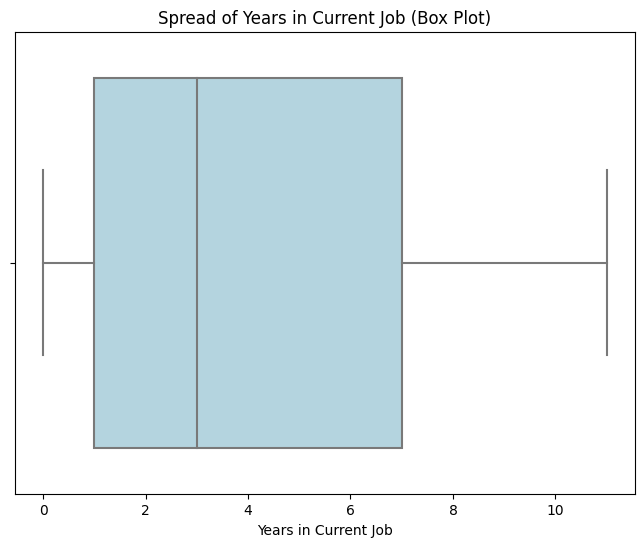

In [91]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Years_in_current_job'], color='lightblue')
plt.xlabel('Years in Current Job')
plt.title('Spread of Years in Current Job (Box Plot)')
plt.show()

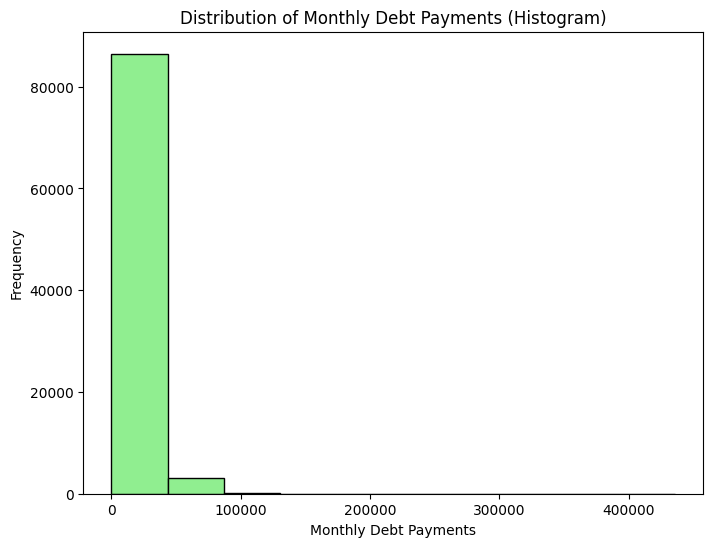

In [92]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Monthly_Debt'] , bins=10 , edgecolor='k', color='lightgreen')
plt.xlabel('Monthly Debt Payments')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Debt Payments (Histogram)')
plt.show()

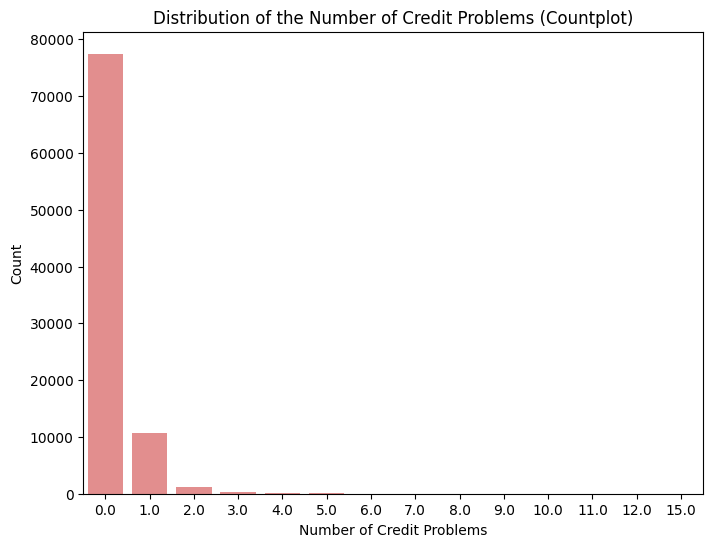

In [93]:
# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x= df['Number_of_Credit_Problems'], color='lightcoral')
plt.xlabel('Number of Credit Problems')
plt.ylabel('Count')
plt.title('Distribution of the Number of Credit Problems (Countplot)')
plt.show()

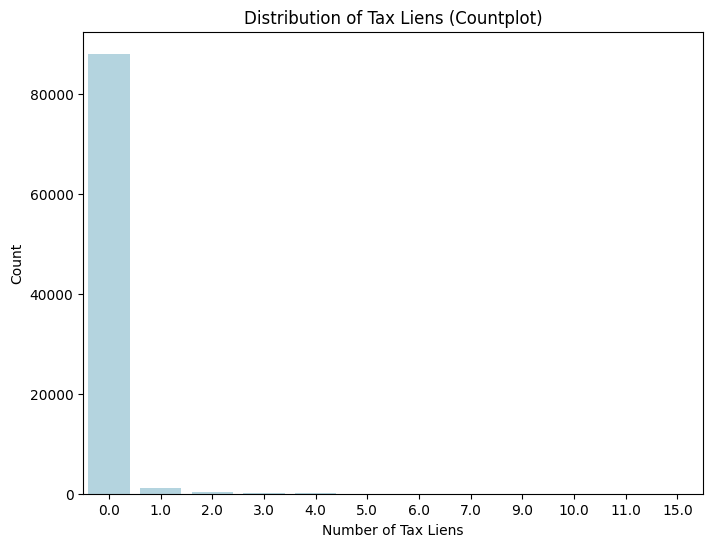

In [94]:
# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x= df['Tax_Liens'] , color='lightblue')
plt.xlabel('Number of Tax Liens')
plt.ylabel('Count')
plt.title('Distribution of Tax Liens (Countplot)')
plt.show()

Spliting The Data

In [95]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [97]:
lr = LogisticRegression()

In [98]:
lr.fit(x_train, y_train)

LogisticRegression()

In [99]:
y_pred = lr.predict(x_test)

In [100]:
print (lr.score(x_train , y_train))
print (lr.score(x_test , y_test))

0.7932302037065401
0.793984962406015
